<a href="https://colab.research.google.com/github/ARPITAKAR/Time_series_learning/blob/main/PM2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install download

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


# Path for downloading and unzipping the file

In [3]:
path=download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq',kind="zip")

Creating data folder...

file_sizes: 7.96MB [00:01, 7.45MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


# The ls command is used to list directory contents. The flags attached (-alrt) modify how that list is displayed:

## -a (all): Includes hidden files (those starting with a dot, like .bashrc or .gitignore).

 ## -l (long): Displays the "long" format, providing detailed information like permissions, owner, size, and modification date.

## -t (time): Sorts the files by modification time (newest first).

## -r (reverse): Reverses the sort order.

In [4]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Dec 27 03:42 ..
-rw-r--r-- 1 root root 2835916 Dec 27 03:42 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Dec 27 03:42 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Dec 27 03:42 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Dec 27 03:42 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Dec 27 03:42 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Dec 27 03:42 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Dec 27 03:42 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Dec 27 03:42 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Dec 27 03:42 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Dec 27 03:42 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Dec 27 03:42 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [5]:
import os

# List files in the directory
dir_path = '/tmp/aq'
print(os.listdir(dir_path))


['PRSA_Data_20130301-20170228']


In [6]:
import os

# List files in the subdirectory
sub_dir_path = '/tmp/aq/PRSA_Data_20130301-20170228'
print(os.listdir(sub_dir_path))


['PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']


In [7]:
import pandas as pd
import os

# List files in the subdirectory
sub_dir_path = '/tmp/aq/PRSA_Data_20130301-20170228'
print(os.listdir(sub_dir_path))

# Assuming 'PRSA_Data_Dingling_20130301-20170228.csv' is listed in the subdirectory
file_path = os.path.join(sub_dir_path, 'PRSA_Data_Dingling_20130301-20170228.csv')

# Check if the file exists
if os.path.exists(file_path):
    # Read the CSV file with the specified encoding
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    # Display the first few rows of the dataframe to verify
    print(df.head())
else:
    print(f"File not found: {file_path}")


['PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP

In [8]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [11]:
# Usage
date_string = "2025 12 27 09"
result = convert_to_date(date_string)

print(result)
# Output: 2025-12-27 09:00:00
print(type(result))
# Output: <class 'datetime.datetime'>

2025-12-27 09:00:00
<class 'datetime.datetime'>


In [12]:
# Assuming 'PRSA_Data_Dingling_20130301-20170228.csv' is listed in the subdirectory
file_path = os.path.join(sub_dir_path, 'PRSA_Data_Dingling_20130301-20170228.csv')

# Check if the file exists
if os.path.exists(file_path):
    # Read the CSV file with the specified encoding
    aq_df = pd.read_csv(file_path, encoding='ISO-8859-1',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)
    # Display the first few rows of the dataframe to verify
    print(aq_df.head())
else:
    print(f"File not found: {file_path}")

/tmp/ipython-input-3868457546.py:7: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  aq_df = pd.read_csv(file_path, encoding='ISO-8859-1',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)
/tmp/ipython-input-3868457546.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df = pd.read_csv(file_path, encoding='ISO-8859-1',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)
/tmp/ipython-input-3868457546.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df = pd.read_csv(file_path, encoding='ISO-8859-1',parse_date

  year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  


In [13]:
aq_df.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [14]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [15]:
aq_df['month']=pd.to_numeric(aq_df['month'])

In [16]:
print("ROWS",aq_df.shape[0])
print("Colums",aq_df.shape[1])
print("\nfeatures",aq_df.columns.tolist())
print("\nMissing Values",aq_df.isnull().any())
print("\nunique values",aq_df.nunique())

ROWS 35064
Colums 19

features ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

unique values year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10      

In [17]:
aq_df.describe()

year_month_day_hour            No         month         PM2.5  \
count                35064  35064.000000  35064.000000  34285.000000   
mean   2015-03-01 11:30:00  17532.500000      6.522930     65.989497   
min    2013-03-01 00:00:00      1.000000      1.000000      3.000000   
25%    2014-03-01 05:45:00   8766.750000      4.000000     14.000000   
50%    2015-03-01 11:30:00  17532.500000      7.000000     41.000000   
75%    2016-02-29 17:15:00  26298.250000     10.000000     93.000000   
max    2017-02-28 23:00:00  35064.000000     12.000000    881.000000   
std                    NaN  10122.249256      3.448752     72.267723   

               PM10           SO2           NO2            CO            O3  \
count  34408.000000  34334.000000  33830.000000  33052.000000  33850.000000   
mean      83.739723     11.749650     27.585467    904.896073     68.548371   
min        2.000000      0.285600      1.026500    100.000000      0.214200   
25%       26.000000      2.000000      9.000000    300.000000     31.000000   
50%       60.000000      5.000000     19.000000    600.000000     61.000000   
75%      117.000000     15.000000     38.000000   1200.000000     90.000000   
max      905.000000    156.000000    205.000000  10000.000000    500.000000   
std       79.541685     15.519259     26.383882    903.306220     53.764424   

               TEMP          PRES          DEWP          RAIN          WSPM  
count  35011.000000  35014.000000  35011.000000  35013.000000  35021.000000  
mean      13.686111   1007.760278      1.505495      0.060366      1.853836  
min      -16.600000    982.400000    -35.100000      0.000000      0.000000  
25%        3.400000    999.300000    -10.200000      0.000000      1.000000  
50%       14.700000   1007.400000      1.800000      0.000000      1.500000  
75%       23.300000   1016.000000     14.200000      0.000000      2.300000  
max       41.400000   1036.500000     27.200000     52.100000     10.000000  
std       11.365313     10.225664     13.822099      0.752899      1.309808

In [18]:
aq_df_non_indexed=aq_df.copy()

In [19]:
aq_df=aq_df.set_index('year_month_day_hour')

In [20]:
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [21]:
aq_df.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [22]:
aq_df.loc['2013-03-01':'2013-03-05']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00    1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00    2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00    3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00    4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00    5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                  ...   ...    ...  ..  ...    ...    ...   ...   ...   
2013-03-05 19:00:00  116  2013      3   5   19  179.0  200.0  50.0  96.0   
2013-03-05 20:00:00  117  2013      3   5   20  172.0  180.0  43.0  94.0   
2013-03-05 21:00:00  118  2013      3   5   21  179.0  191.0  38.0  80.0   
2013-03-05 22:00:00  119  2013      3   5   22  173.0  168.0  39.0  73.0   
2013-03-05 23:00:00  120  2013      3   5   23  170.0  162.0  42.0  72.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  1600.0  82.0   7.7  1005.4  -7.6   0.0  NNE   0.2   
2013-03-05 20:00:00  1899.0  82.0   6.3  1005.9  -7.3   0.0  NNE   0.7   
2013-03-05 21:00:00  1700.0  82.0   5.6  1006.0  -7.3   0.0  NNE   0.2   
2013-03-05 22:00:00  1800.0  82.0   4.9  1005.8  -7.0   0.0    N   1.7   
2013-03-05 23:00:00  1700.0  82.0   3.7  1005.7  -6.9   0.0   NE   0.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-05 19:00:00  Dingling  
2013-03-05 20:00:00  Dingling  
2013-03-05 21:00:00  Dingling  
2013-03-05 22:00:00  Dingling  
2013-03-05 23:00:00  Dingling  

[120 rows x 18 columns]

In [23]:
aq_df.loc['2013':'2015']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2013-03-01 00:00:00      1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

In [24]:
pm_data=aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='year_month_day_hour'>

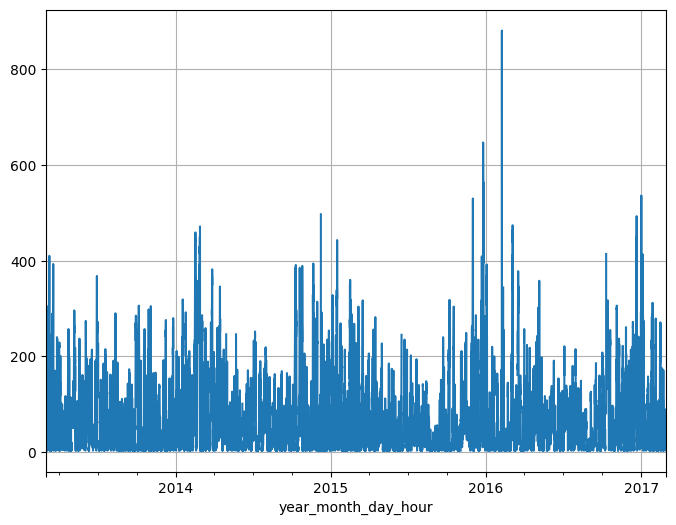

In [25]:
pm_data.plot(grid=True)

<Axes: xlabel='year_month_day_hour'>

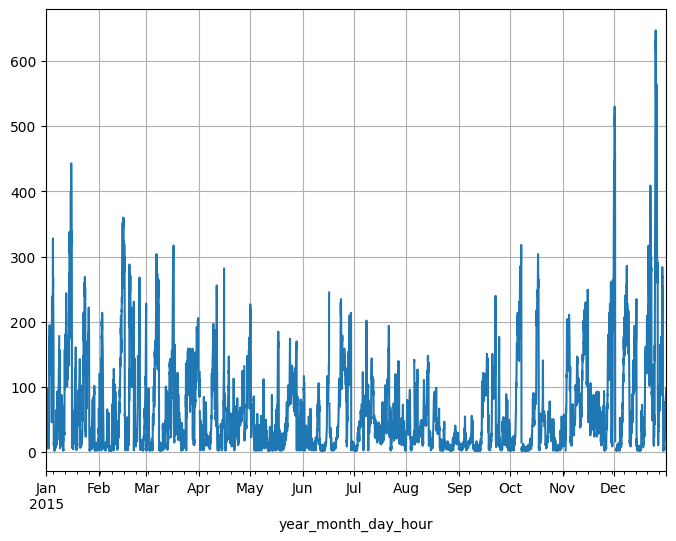

In [26]:
aq_df_2015=aq_df.loc['2015']
pm_data_2015=aq_df_2015['PM2.5']
pm_data_2015.plot(grid=True)

<Axes: xlabel='year_month_day_hour'>

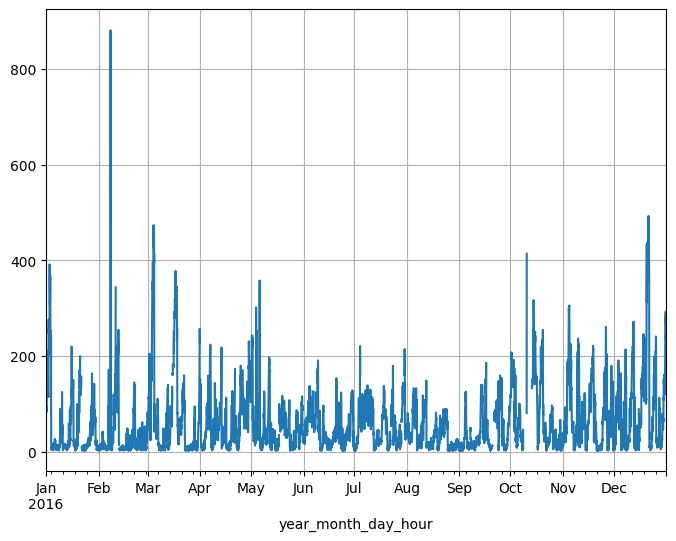

In [27]:
aq_df_2016=aq_df.loc['2016']
pm_data_2016=aq_df_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [28]:
import plotly.express as px
fig=px.line(aq_df_non_indexed,x='year_month_day_hour',y='PM2.5',title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [29]:
fig=px.line(aq_df_non_indexed,x='year_month_day_hour',y='PM2.5',title='PM2.5 with slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(buttons=list([
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(count=1,label="2y",step="year",stepmode="backward"),
        dict(count=1,label="3y",step="year",stepmode="backward"),
        dict(step="all")
    ]))
)
fig.show()

In [30]:
df_2014=aq_df[aq_df['year']=='2014']
df_2014.head()

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                         
2014-01-01 00:00:00  7345  2014      1   1    0   27.0  104.0  12.0   9.0   
2014-01-01 01:00:00  7346  2014      1   1    1   25.0   86.0  12.0   9.0   
2014-01-01 02:00:00  7347  2014      1   1    2   27.0   85.0  14.0   9.0   
2014-01-01 03:00:00  7348  2014      1   1    3   34.0   98.0  19.0  15.0   
2014-01-01 04:00:00  7349  2014      1   1    4   32.0  102.0  18.0  15.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2014-01-01 00:00:00    NaN   NaN   6.8  1003.7 -15.9   0.0  WSW   5.2   
2014-01-01 01:00:00  500.0  63.0   6.5  1003.6 -16.2   0.0    W   3.6   
2014-01-01 02:00:00  400.0  63.0   6.4  1003.4 -15.6   0.0  WNW   5.3   
2014-01-01 03:00:00  400.0  56.0   6.2  1002.9 -15.8   0.0  WNW   4.7   
2014-01-01 04:00:00  400.0  33.0   6.1  1002.7 -15.2   0.0    W   3.5   

                      station  
year_month_day_hour            
2014-01-01 00:00:00  Dingling  
2014-01-01 01:00:00  Dingling  
2014-01-01 02:00:00  Dingling  
2014-01-01 03:00:00  Dingling  
2014-01-01 04:00:00  Dingling

In [31]:
df_2015=aq_df[aq_df['year']=='2015']
df_2015.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2  CO  \
year_month_day_hour                                                           
2015-01-01 00:00:00  16105  2015      1   1    0    NaN   NaN  NaN  NaN NaN   
2015-01-01 01:00:00  16106  2015      1   1    1    NaN   NaN  NaN  NaN NaN   
2015-01-01 02:00:00  16107  2015      1   1    2    NaN   NaN  NaN  NaN NaN   
2015-01-01 03:00:00  16108  2015      1   1    3    NaN   NaN  NaN  NaN NaN   
2015-01-01 04:00:00  16109  2015      1   1    4    NaN   NaN  NaN  NaN NaN   

                     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                     
2015-01-01 00:00:00 NaN  -4.0  1025.0 -23.7   0.0   NW   3.3  Dingling  
2015-01-01 01:00:00 NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2  Dingling  
2015-01-01 02:00:00 NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7  Dingling  
2015-01-01 03:00:00 NaN  -5.0  1023.0 -23.5   0.0    N   1.7  Dingling  
2015-01-01 04:00:00 NaN  -5.0  1024.0 -24.0   0.0   NE   1.8  Dingling

/tmp/ipython-input-49600986.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-49600986.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Air Quality plot for year 2014 and 2015')

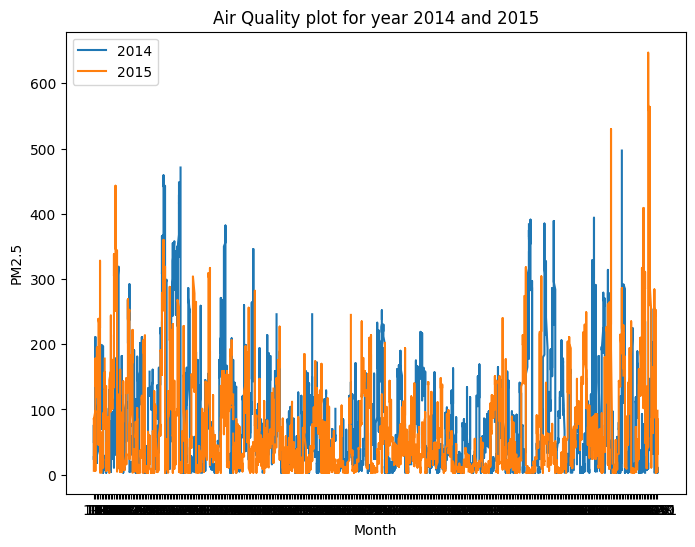

In [32]:
df_2014['month_day_hour']=df_2014.apply(lambda x:str(x['month'])+"-"+x['day'],axis=1)
df_2015['month_day_hour']=df_2015.apply(lambda x:str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df_2014['month_day_hour'],df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'],df_2015['PM2.5'])
plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title("Air Quality plot for year 2014 and 2015")

In [33]:
aq_df['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [34]:
aq_df['2014':'2016'][['month','PM2.5',"TEMP"]].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

In [35]:
aq_df

No  year  month day hour  PM2.5  PM10  SO2  NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00      1  2013      3   1    0    4.0   4.0  3.0  NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0   7.0  3.0  NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0   5.0  3.0  2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0   6.0  3.0  NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0   5.0  3.0  NaN   
...                    ...   ...    ...  ..  ...    ...   ...  ...  ...   
2017-02-28 19:00:00  35060  2017      2  28   19   11.0  11.0  2.0  2.0   
2017-02-28 20:00:00  35061  2017      2  28   20   13.0  13.0  2.0  2.0   
2017-02-28 21:00:00  35062  2017      2  28   21    9.0  14.0  2.0  2.0   
2017-02-28 22:00:00  35063  2017      2  28   22   10.0  12.0  2.0  2.0   
2017-02-28 23:00:00  35064  2017      2  28   23   13.0  16.0  4.0  9.0   

                        CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00  200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                    ...    ...   ...     ...   ...   ...  ...   ...   
2017-02-28 19:00:00  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3   
2017-02-28 20:00:00  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1   
2017-02-28 21:00:00  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5   
2017-02-28 22:00:00  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4   
2017-02-28 23:00:00  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2017-02-28 19:00:00  Dingling  
2017-02-28 20:00:00  Dingling  
2017-02-28 21:00:00  Dingling  
2017-02-28 22:00:00  Dingling  
2017-02-28 23:00:00  Dingling  

[35064 rows x 18 columns]

In [36]:
# Filter the DataFrame to include only rows where the 'year' column is 2015
aq_df_2015 = aq_df[aq_df['year'] == '2015']
aq_df_2015.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2  CO  \
year_month_day_hour                                                           
2015-01-01 00:00:00  16105  2015      1   1    0    NaN   NaN  NaN  NaN NaN   
2015-01-01 01:00:00  16106  2015      1   1    1    NaN   NaN  NaN  NaN NaN   
2015-01-01 02:00:00  16107  2015      1   1    2    NaN   NaN  NaN  NaN NaN   
2015-01-01 03:00:00  16108  2015      1   1    3    NaN   NaN  NaN  NaN NaN   
2015-01-01 04:00:00  16109  2015      1   1    4    NaN   NaN  NaN  NaN NaN   

                     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                     
2015-01-01 00:00:00 NaN  -4.0  1025.0 -23.7   0.0   NW   3.3  Dingling  
2015-01-01 01:00:00 NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2  Dingling  
2015-01-01 02:00:00 NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7  Dingling  
2015-01-01 03:00:00 NaN  -5.0  1023.0 -23.5   0.0    N   1.7  Dingling  
2015-01-01 04:00:00 NaN  -5.0  1024.0 -24.0   0.0   NE   1.8  Dingling

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

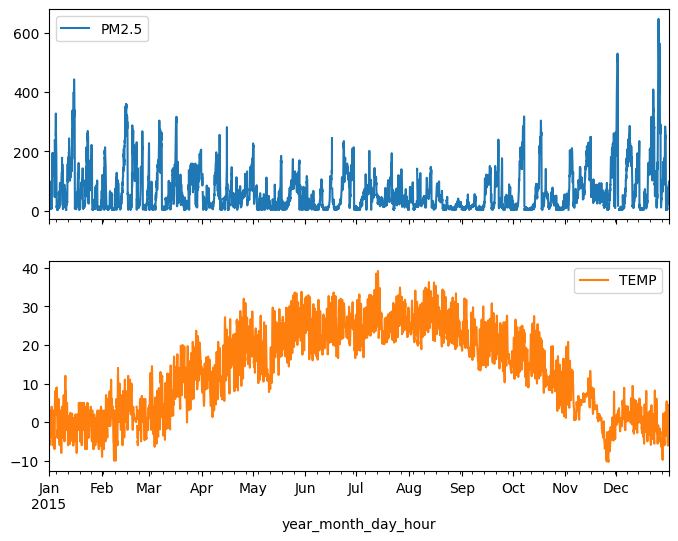

In [37]:
pm_data_2015=aq_df_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots=True)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

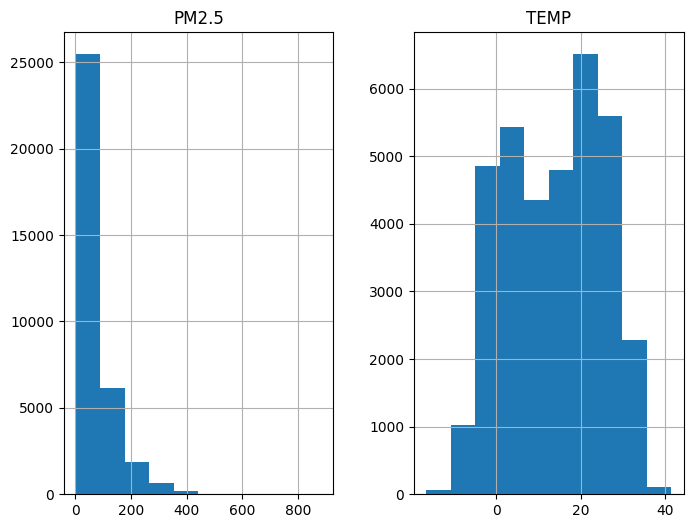

In [38]:
aq_df[['PM2.5',"TEMP"]].hist()

# What is a Density Plot?
###  Imagine taking a histogram with infinitely small bins and smoothing out the jagged edges. The area under this curve always equals 1, representing 100% of your data points.

### The Peaks: These represent the most common temperature ranges in your Air Quality dataset (the "mode").

### The Spread: A wide curve suggests highly variable temperatures across the year; a narrow, tall spike suggests the temperature stays very consistent.

<Axes: ylabel='Density'>

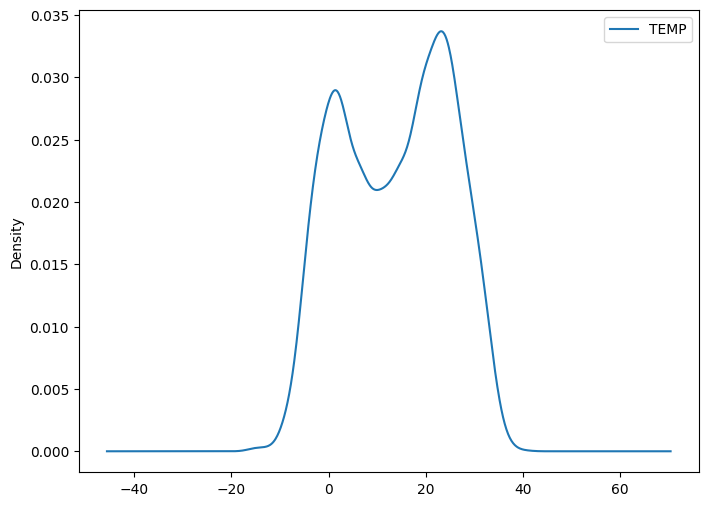

In [39]:
aq_df[['TEMP']].plot(kind='density')

Lag plot is a special type of scatter plot with x-axis being the current time and Y-Axis is the lag Period.
By default Lag period is 1 called as First order Lag Plot
when lag period is 2 it's called second order Lag Plot

Linerity of the Model suggest that an Auto-regressive model is probably a better choice.

Through lag plot we can check
1. Linearity
2. Outliers
3. Randomness
4. check where it is a serial co-relation or Auto co-relation
> Add blockquote



<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

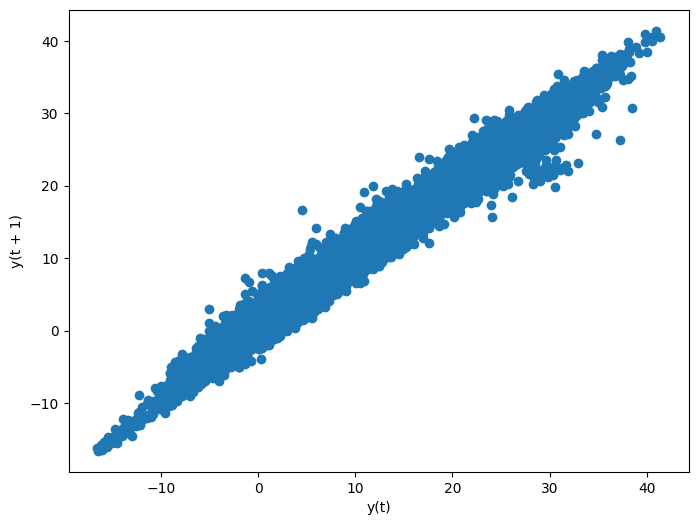

In [40]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)
#lag of 1 hour

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

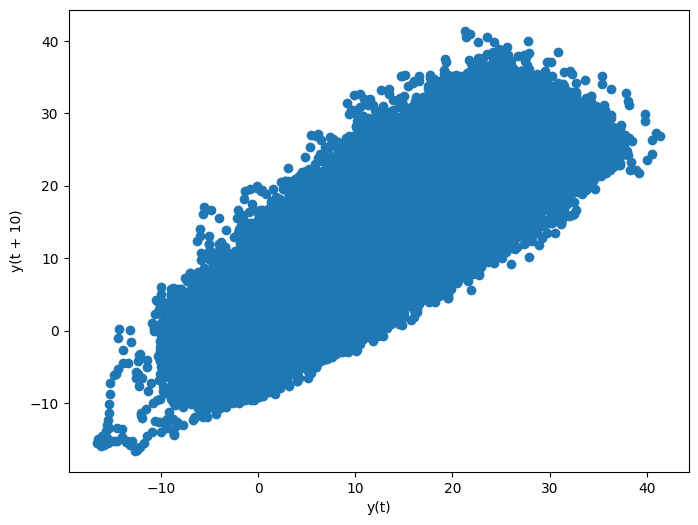

In [41]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=10)
#lag of 10 hour

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

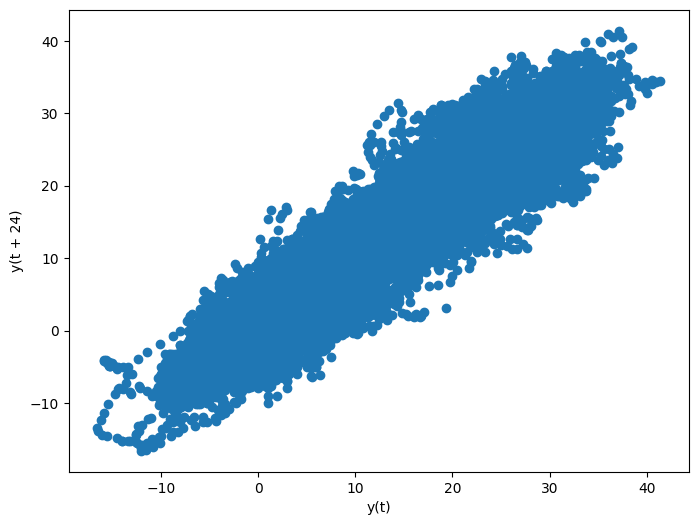

In [42]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=24)
#lag of 24 hour

\As the points are towards the center we can find more co-relation as it is away we can find co-relation reduces.
Lag is kind of Autocorelation
corelation comparing two variables and checking down in relation in them.....

Auto-corelation is corelation within itself.....
positve and negative trend  both can exist


If data is accumulated at center there is no co-relation.:

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

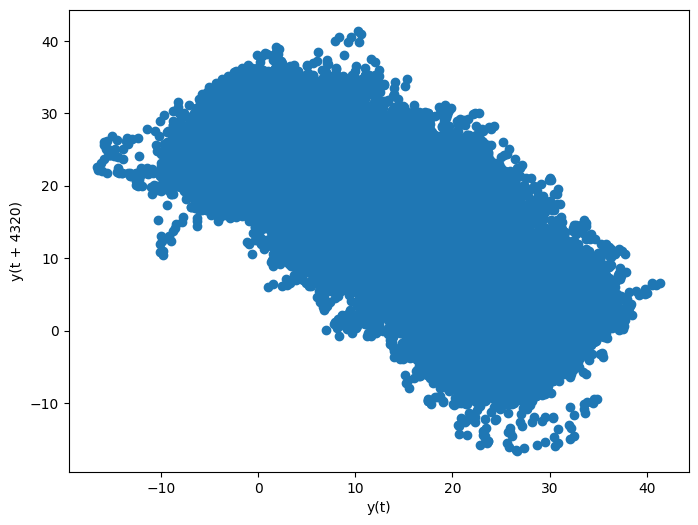

In [43]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)
#lag of six months

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

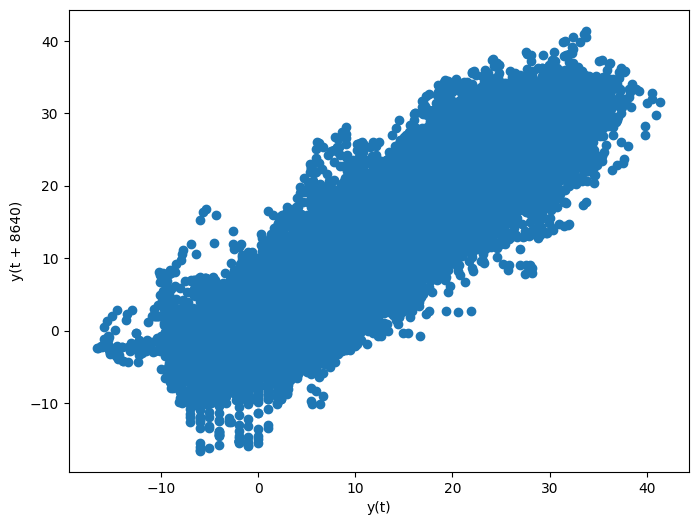

In [44]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)
#lag of Yearly

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

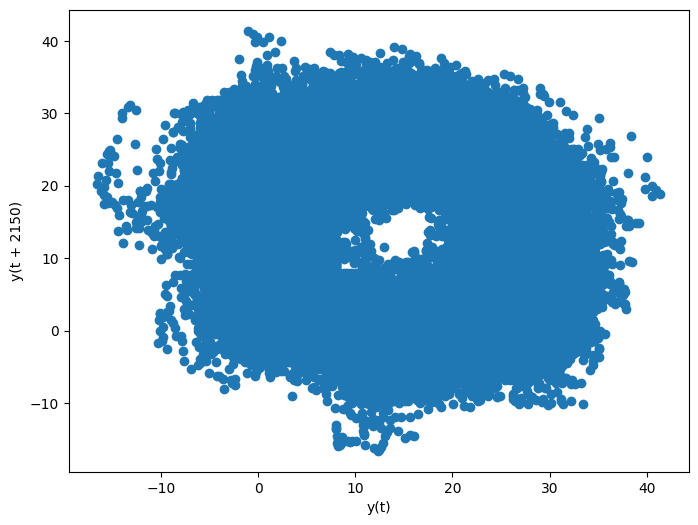

In [45]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=2150)
#lag of 3mnts

No correlation exist here

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

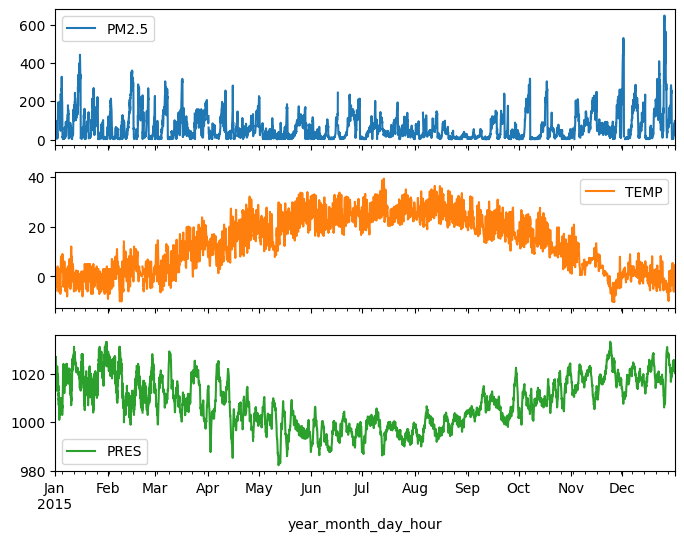

In [46]:
aq_df_2015=aq_df[aq_df['year']=='2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots=True)

In [47]:
aq_df.sample()

No  year  month day hour  PM2.5  PM10   SO2  NO2  \
year_month_day_hour                                                        
2015-02-04 09:00:00  16930  2015      2   4    9   13.0  14.0  16.0  8.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2015-02-04 09:00:00  300.0  62.0   0.0  1022.0 -16.8   0.0  NNW   1.1   

                      station  
year_month_day_hour            
2015-02-04 09:00:00  Dingling

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

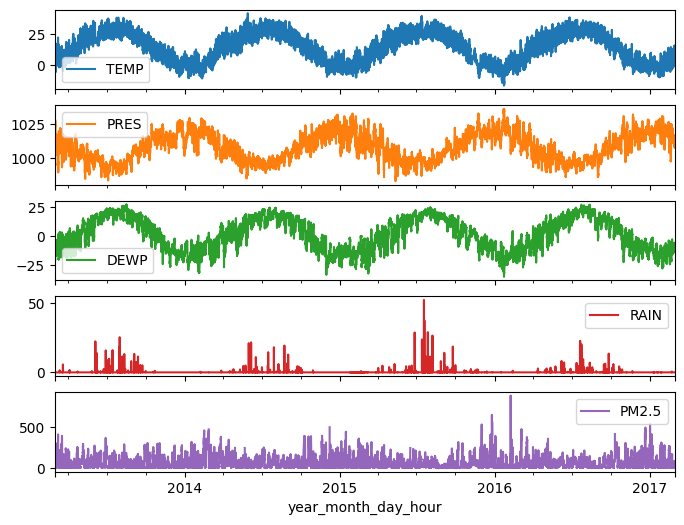

In [48]:
multi_data=aq_df[['TEMP','PRES','DEWP','RAIN','PM2.5']]
multi_data.plot(subplots=True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

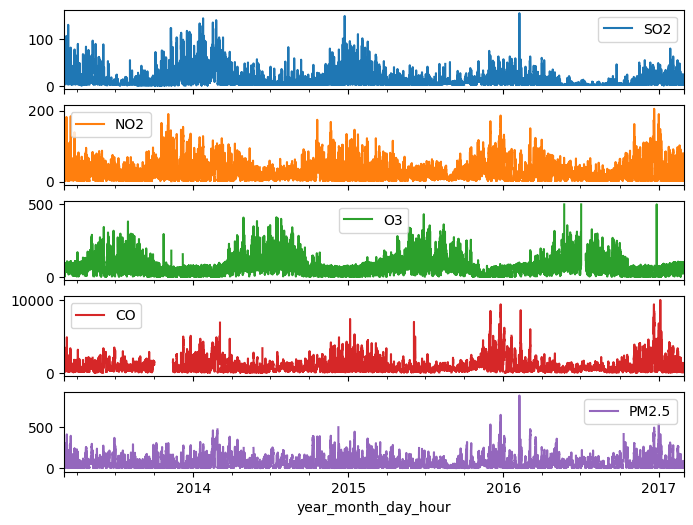

In [49]:
multi_data=aq_df[['SO2','NO2','O3','CO','PM2.5']]
multi_data.plot(subplots=True)

Text(0.5, 0, 'year-month-day-hour')

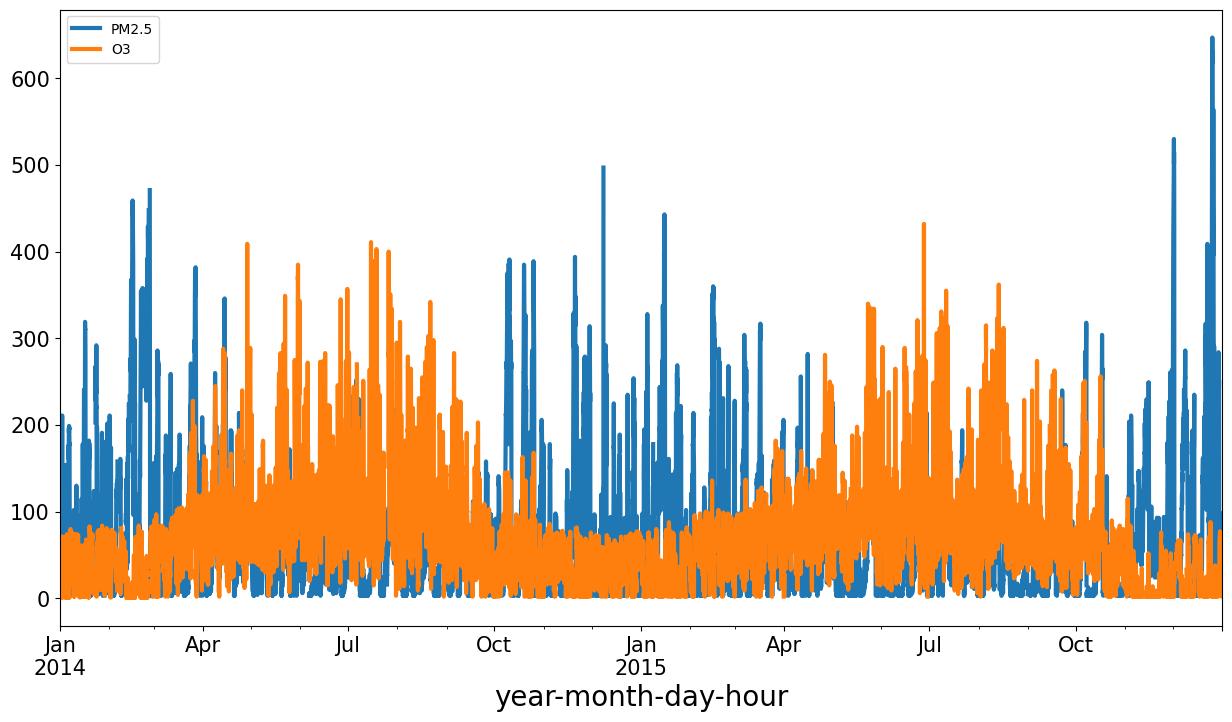

In [50]:
aq_df['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8),linewidth=3,fontsize=15)
plt.xlabel('year-month-day-hour',fontsize=20)

In [51]:
aq_df_2015[aq_df['year']=='2015']

/tmp/ipython-input-2966816932.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2015-01-01 00:00:00  16105  2015      1   1    0    NaN    NaN   NaN   NaN   
2015-01-01 01:00:00  16106  2015      1   1    1    NaN    NaN   NaN   NaN   
2015-01-01 02:00:00  16107  2015      1   1    2    NaN    NaN   NaN   NaN   
2015-01-01 03:00:00  16108  2015      1   1    3    NaN    NaN   NaN   NaN   
2015-01-01 04:00:00  16109  2015      1   1    4    NaN    NaN   NaN   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO   O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2015-01-01 00:00:00     NaN  NaN  -4.0  1025.0 -23.7   0.0   NW   3.3   
2015-01-01 01:00:00     NaN  NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2   
2015-01-01 02:00:00     NaN  NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7   
2015-01-01 03:00:00     NaN  NaN  -5.0  1023.0 -23.5   0.0    N   1.7   
2015-01-01 04:00:00     NaN  NaN  -5.0  1024.0 -24.0   0.0   NE   1.8   
...                     ...  ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0  2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0  2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0  2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0  2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0  2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2015-01-01 00:00:00  Dingling  
2015-01-01 01:00:00  Dingling  
2015-01-01 02:00:00  Dingling  
2015-01-01 03:00:00  Dingling  
2015-01-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[8760 rows x 18 columns]

Null value can't drop time series needs to be coninious

In [52]:
aq_df.isnull().values.any()

np.True_

In [53]:
aq_df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [54]:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

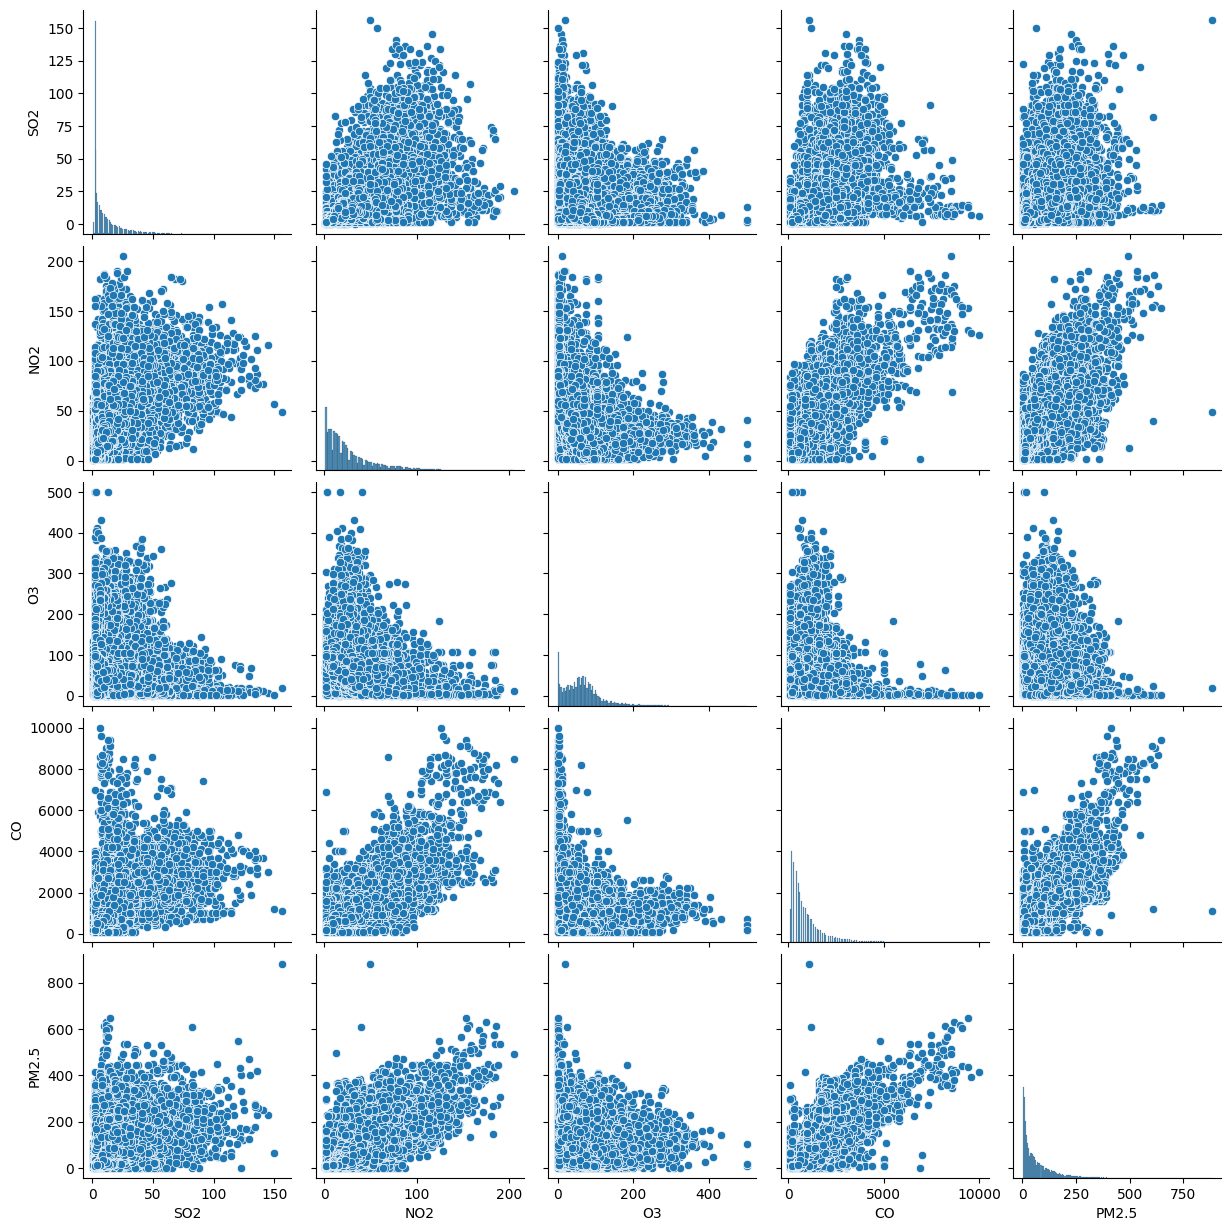

In [55]:
g=sns.pairplot(aq_df[['SO2','NO2','O3','CO','PM2.5']])

In [56]:
aq_corr=aq_df[['SO2','NO2','O3','CO','PM2.5']].corr(method='pearson')
aq_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

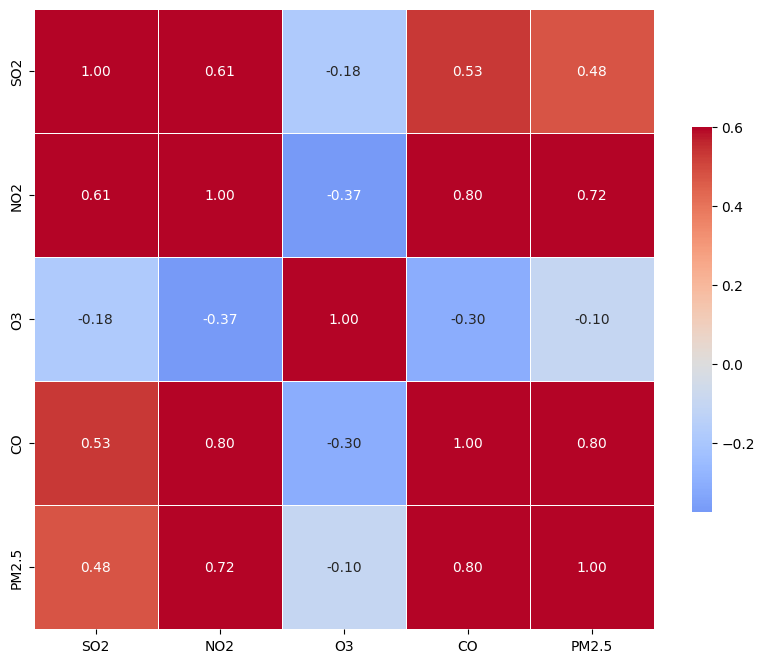

In [57]:
g = sns.heatmap(aq_corr, vmax=0.6, center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10, 10)
plt.show()

In [58]:
aq_df.groupby('wd').agg({'PM2.5': ['median', 'mean', 'max', 'min']}).reset_index()

wd  PM2.5                       
        median       mean    max  min
0     E   70.0  88.623363  434.0  3.0
1   ENE   56.5  77.685514  647.0  3.0
2   ESE   78.5  96.492276  632.0  3.0
3     N   29.0  57.546221  536.0  3.0
4    NE   32.0  57.390083  530.0  3.0
5   NNE   26.0  53.946239  881.0  3.0
6   NNW   33.0  62.790775  548.0  3.0
7    NW   21.0  52.769116  535.0  3.0
8     S   52.0  72.497281  511.0  3.0
9    SE   70.0  85.045709  617.0  3.0
10  SSE   61.0  79.925967  614.0  3.0
11  SSW   50.0  73.078253  493.0  3.0
12   SW   46.0  70.233140  459.0  3.0
13    W   22.0  49.488104  446.0  3.0
14  WNW   14.0  37.307447  515.0  3.0
15  WSW   39.0  66.725926  451.0  3.0

In [59]:
aq_df_na=aq_df.copy()
aq_df_na=aq_df_na.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

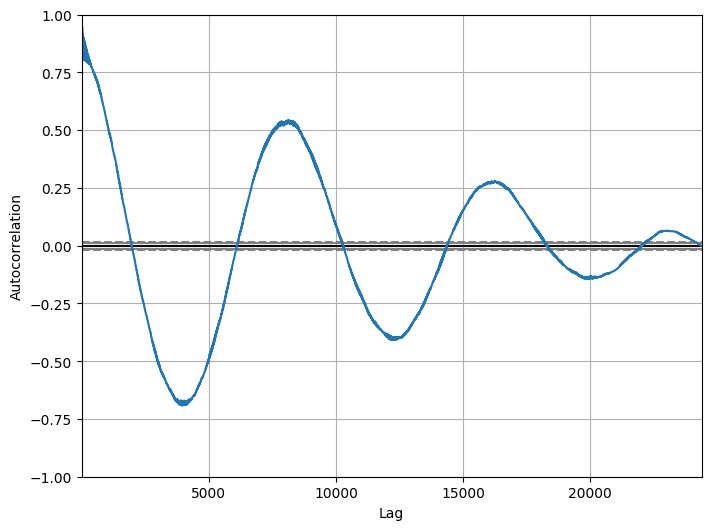

In [60]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

In [61]:
aq_df_na['TEMP'].resample('M').mean()

/tmp/ipython-input-3205953035.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839216
2016-08-31    27.146657
2016-09-30    21.304035
2016-10-31    12.877827
2016-11-30     4.032668
2016-12-31     0.081077
2017-01-31    -1.399571
2017-02-28     2.377823
Freq: ME, Name: TEMP, dtype: float64

/tmp/ipython-input-1600360623.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

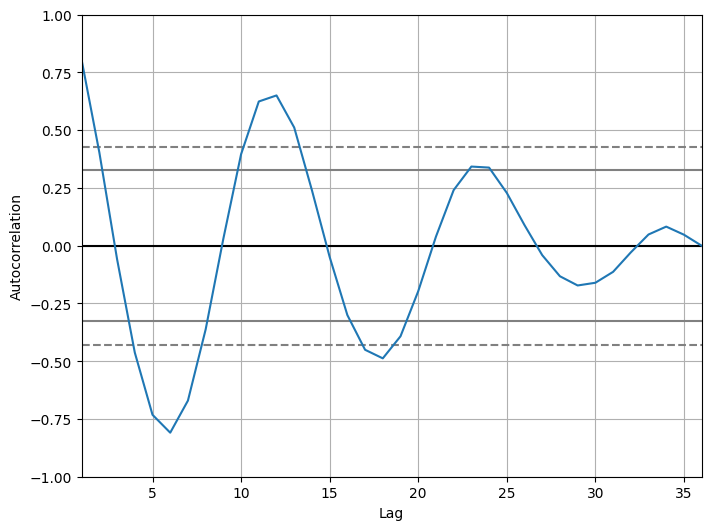

In [62]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample("M").mean())

/tmp/ipython-input-2047326290.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

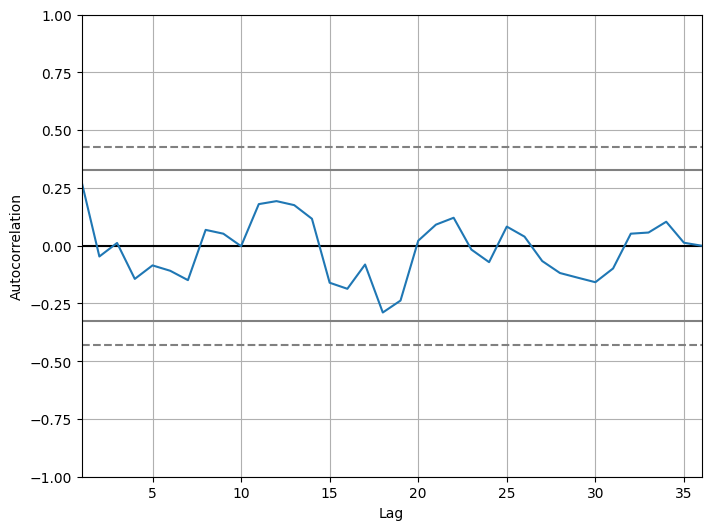

In [63]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample("M").mean())

## here we see everything is under 90% confidence level it doesn't means there is no autocorelation, it means maybe the strength of autocorelation will be lesser compared to it.